In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip3 install catboost
!pip3 install river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import time
from river import stream
from statistics import mode

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/decimal_DoS.csv")

In [ ]:
df

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
0,291,0,0,0,0,0,0,0,0,ATTACK,DoS,DoS
1,291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
2,291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
3,291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
4,291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...
74658,291,15,9,13,9,11,9,11,8,ATTACK,DoS,DoS
74659,291,15,9,13,9,11,9,11,8,ATTACK,DoS,DoS
74660,291,15,9,13,9,11,9,11,8,ATTACK,DoS,DoS
74661,291,15,9,13,9,11,9,11,8,ATTACK,DoS,DoS


In [ ]:
df['Label'] = df['specific_class']

In [ ]:
df.drop(df.columns[[9, 10, 11]], axis=1, inplace=True)

In [ ]:
df

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,Label
0,291,0,0,0,0,0,0,0,0,DoS
1,291,14,11,4,4,3,3,8,12,DoS
2,291,14,11,4,4,3,3,8,12,DoS
3,291,14,11,4,4,3,3,8,12,DoS
4,291,14,11,4,4,3,3,8,12,DoS
...,...,...,...,...,...,...,...,...,...,...
74658,291,15,9,13,9,11,9,11,8,DoS
74659,291,15,9,13,9,11,9,11,8,DoS
74660,291,15,9,13,9,11,9,11,8,DoS
74661,291,15,9,13,9,11,9,11,8,DoS


In [ ]:
df.to_csv('/content/drive/MyDrive/decimal_DoS.csv', index=False)

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/decimal_benign.csv',
                      '/content/drive/MyDrive/decimal_spoofing-GAS.csv',
                      '/content/drive/MyDrive/decimal_spoofing-RPM.csv',
                      '/content/drive/MyDrive/decimal_spoofing-SPEED.csv',
                      '/content/drive/MyDrive/decimal_spoofing-STEERING_WHEEL.csv']), ignore_index=True)
print(df)

           ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0          65      96       0       0       0       0       0       0       0   
1        1068     132      13     160       0       0       0       0       0   
2         535     127     255     127     255     127     255     127     255   
3         131      15     224       0       0       0       0       0       0   
4         936       1       0      39      16       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
1333551   128     132       3       2      35      24       5     138      34   
1333552   128     132       3       2      35      24       5     138      34   
1333553   128     132       3       2      35      24       5     138      34   
1333554   128     132       3       2      35      24       5     138      34   
1333555   128       0       0       0       0       0       0       0       0   

          label  category  

In [ ]:
df['Label'] = df['specific_class']
print(df)

           ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0          65      96       0       0       0       0       0       0       0   
1        1068     132      13     160       0       0       0       0       0   
2         535     127     255     127     255     127     255     127     255   
3         131      15     224       0       0       0       0       0       0   
4         936       1       0      39      16       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
1333551   128     132       3       2      35      24       5     138      34   
1333552   128     132       3       2      35      24       5     138      34   
1333553   128     132       3       2      35      24       5     138      34   
1333554   128     132       3       2      35      24       5     138      34   
1333555   128       0       0       0       0       0       0       0       0   

          label  category  

In [ ]:
df.drop(df.columns[[9, 10, 11]], axis=1, inplace=True)
print(df)

           ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0          65      96       0       0       0       0       0       0       0   
1        1068     132      13     160       0       0       0       0       0   
2         535     127     255     127     255     127     255     127     255   
3         131      15     224       0       0       0       0       0       0   
4         936       1       0      39      16       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
1333551   128     132       3       2      35      24       5     138      34   
1333552   128     132       3       2      35      24       5     138      34   
1333553   128     132       3       2      35      24       5     138      34   
1333554   128     132       3       2      35      24       5     138      34   
1333555   128       0       0       0       0       0       0       0       0   

                  Label  
0

In [ ]:
df.to_csv("/content/drive/MyDrive/CICIOV2024_merged.csv", index=False)

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/decimal_DoS.csv',
                      '/content/drive/MyDrive/CICIOV2024_merged.csv',]), ignore_index=True)
print(df)

          ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0        291       0       0       0       0       0       0       0       0   
1        291      14      11       4       4       3       3       8      12   
2        291      14      11       4       4       3       3       8      12   
3        291      14      11       4       4       3       3       8      12   
4        291      14      11       4       4       3       3       8      12   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1408214  128     132       3       2      35      24       5     138      34   
1408215  128     132       3       2      35      24       5     138      34   
1408216  128     132       3       2      35      24       5     138      34   
1408217  128     132       3       2      35      24       5     138      34   
1408218  128       0       0       0       0       0       0       0       0   

                  Label  
0            

In [ ]:
# Save merged decimal CICIoV2024 dataset
df.to_csv("/content/drive/MyDrive/CICIOV2024_merged.csv", index=False)

In [ ]:
# Read merged CICIoV2024 dataset
df = pd.read_csv("/content/drive/MyDrive/CICIOV2024_merged.csv")

In [ ]:
df.Label.value_counts()

Label
BENIGN            1223737
DoS                 74663
RPM                 54900
SPEED               24951
STEERING_WHEEL      19977
GAS                  9991
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

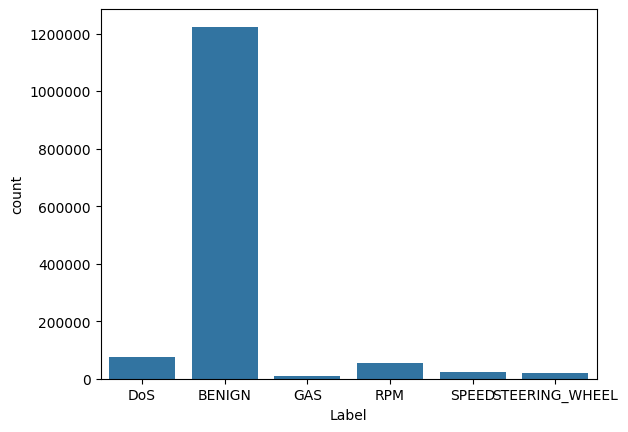

In [ ]:
plt.ticklabel_format(style='plain')
sns.countplot(x='Label', data=df)

In [ ]:
# Preprocessing (normalization and padding values)
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
# Label Encoder (categorical to numerical)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
#0. Benign
#1. DoS
#2. Gas
#3. RPM
#4. Speed
#5. Steering Wheel

df.Label.value_counts()

Label
0    1223737
1      74663
3      54900
4      24951
5      19977
2       9991
Name: count, dtype: int64

In [ ]:
# limits overfitting by not excessively inflating the minority class
# prevents the model from becoming too biased toward the minority class

# Choosing 3 out of 6 instances means that the minority class will be oversampled to have half the number of examples as the majority class
# maintains a more balanced representation while avoiding excessive duplication

# Oversampling the minority class too aggressively can lead to poor generalization on unseen data

# retain the minority class instances and sample the majority class instances
df_minor = df[(df['Label']==2)|(df['Label']==5)|(df['Label']==4)]
df_major = df.drop(df_minor.index)

In [ ]:
X = df_major.drop(['Label'],axis=1)
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [ ]:
df_major['klabel'].value_counts()

klabel
1    543836
0    484408
2    325056
Name: count, dtype: int64

In [ ]:
cols = list(df_major)
cols.insert(10, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [ ]:
df_major

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,klabel,Label
0,291,0,0,0,0,0,0,0,0,0,1
1,291,14,11,4,4,3,3,8,12,0,1
2,291,14,11,4,4,3,3,8,12,0,1
3,291,14,11,4,4,3,3,8,12,0,1
4,291,14,11,4,4,3,3,8,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1363286,513,6,28,6,63,6,42,2,41,1,3
1363287,513,6,28,6,63,6,42,2,41,1,3
1363288,513,6,28,6,63,6,42,2,41,1,3
1363289,513,6,28,6,63,6,42,2,41,1,3


In [ ]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [ ]:
result['Label'].value_counts()

Label
0    9788
1     580
3     458
Name: count, dtype: int64

In [ ]:
result

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,klabel,Label
186609,359,0,128,0,0,0,1,227,0,0,0
1106982,369,16,108,0,0,0,0,0,0,0,0
191167,125,0,0,247,128,0,63,255,255,0,0
1064129,65,96,0,0,0,0,0,0,0,0,0
1020401,131,15,224,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1143118,1200,255,0,128,0,208,0,40,237,2,0
352850,1200,255,0,128,0,32,0,40,248,2,0
733444,936,1,0,39,16,0,0,0,0,2,0
135023,1085,20,0,0,0,0,0,0,0,2,0


In [ ]:
result = result.drop(['klabel'],axis=1)

In [ ]:
result

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,Label
186609,359,0,128,0,0,0,1,227,0,0
1106982,369,16,108,0,0,0,0,0,0,0
191167,125,0,0,247,128,0,63,255,255,0
1064129,65,96,0,0,0,0,0,0,0,0
1020401,131,15,224,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1143118,1200,255,0,128,0,208,0,40,237,0
352850,1200,255,0,128,0,32,0,40,248,0
733444,936,1,0,39,16,0,0,0,0,0
135023,1085,20,0,0,0,0,0,0,0,0


In [ ]:
result.to_csv("/content/drive/MyDrive/CICIoV2024/CICIOV2024_km_aliah.csv", index=False)

In [ ]:
print(result)

           ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
186609    359       0     128       0       0       0       1     227       0   
1106982   369      16     108       0       0       0       0       0       0   
191167    125       0       0     247     128       0      63     255     255   
1064129    65      96       0       0       0       0       0       0       0   
1020401   131      15     224       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
1143118  1200     255       0     128       0     208       0      40     237   
352850   1200     255       0     128       0      32       0      40     248   
733444    936       1       0      39      16       0       0       0       0   
135023   1085      20       0       0       0       0       0       0       0   
142695   1072     131       0       7      52     100       1      18     147   

        Label  
186609     

In [ ]:
result = pd.concat([result, df_minor], ignore_index=True)

In [ ]:
print(result)

        ID  DATA_0  DATA_1  DATA_2  DATA_3  DATA_4  DATA_5  DATA_6  DATA_7  \
0      359       0     128       0       0       0       1     227       0   
1      369      16     108       0       0       0       0       0       0   
2      125       0       0     247     128       0      63     255     255   
3       65      96       0       0       0       0       0       0       0   
4      131      15     224       0       0       0       0       0       0   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
65740  128     132       3       2      35      24       5     138      34   
65741  128     132       3       2      35      24       5     138      34   
65742  128     132       3       2      35      24       5     138      34   
65743  128     132       3       2      35      24       5     138      34   
65744  128       0       0       0       0       0       0       0       0   

      Label  
0         0  
1         0  
2         0  
3      

In [ ]:
result

,ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,Label
0,359,0,128,0,0,0,1,227,0,0
1,369,16,108,0,0,0,0,0,0,0
2,125,0,0,247,128,0,63,255,255,0
3,65,96,0,0,0,0,0,0,0,0
4,131,15,224,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
65740,128,132,3,2,35,24,5,138,34,5
65741,128,132,3,2,35,24,5,138,34,5
65742,128,132,3,2,35,24,5,138,34,5
65743,128,132,3,2,35,24,5,138,34,5


In [ ]:
# Save kmeans CICIoV2024 dataset
result.to_csv("/content/drive/MyDrive/CICIoV2024/CICIOV2024_km_aliah.csv", index=False)

**LCCDE STEP**

In [ ]:
df = result

In [ ]:
# Read the sampled dataset
df = pd.read_csv("/content/drive/MyDrive/CICIoV2024/CICIOV2024_km_aliah.csv")

In [ ]:
df.Label.value_counts()

Label
4    24951
5    19977
2     9991
0     9826
1      600
3      440
Name: count, dtype: int64

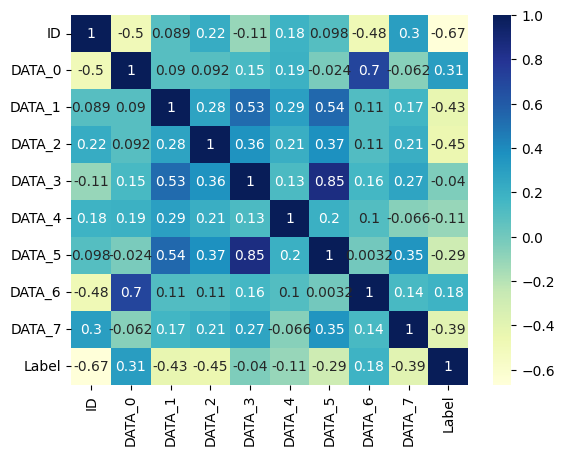

In [ ]:
# Calculate correlations (excluding non-numeric columns)
correlations = df.corr()

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

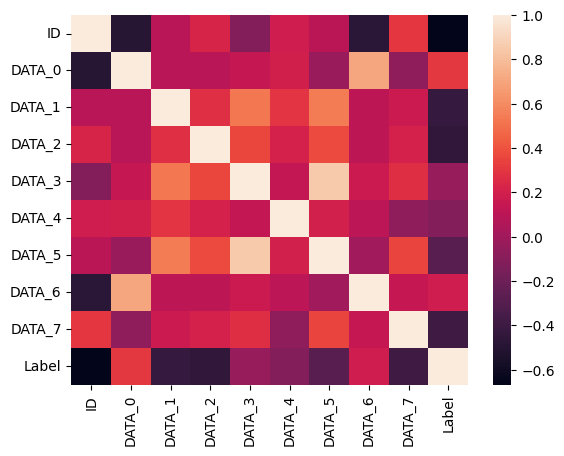

In [ ]:
# plotting correlation heatmap
dataplot=sns.heatmap(df.corr())

# displaying heatmap
plt.show()

In [ ]:
# Split Train set and Test set
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

In [ ]:
pd.Series(y_train).value_counts()

Label
4    19986
5    15886
2     8018
0     7898
1      484
3      356
Name: count, dtype: int64

***SMOTE STEP***

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={0: 8018, 1:8018, 3: 8018})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

Label
4    19986
5    15886
2     8018
0     8018
1     8018
3     8018
Name: count, dtype: int64

***MACHINE LEARNING STARTS***

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 67944, number of used features: 9
[LightGBM] [Info] Start training from score -2.136995
[LightGBM] [Info] Start training from score -2.136995
[LightGBM] [Info] Start training from score -2.136995
[LightGBM] [Info] Start training from score -2.136995
[LightGBM] [Info] Start training from score -1.223652
[LightGBM] [Info] Start training from score -1.453246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

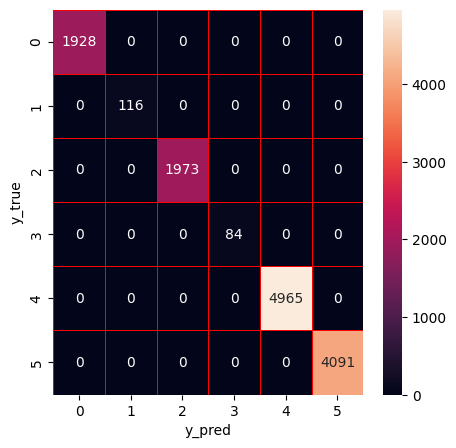

CPU times: user 5.6 s, sys: 108 ms, total: 5.71 s
Wall time: 6.04 s


In [ ]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1928
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00      1973
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00      4965
           5       1.00      1.00      1.00      4091

    accuracy                           1.00     13157
   macro avg       1.00      1.00      1.00     13157
weighted avg       1.00      1.00      1.00     13157

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
Average F1 of XGBoost: 1.0
F1 of XGBoost for each type of attack: [1. 1. 1. 1. 1. 1.]


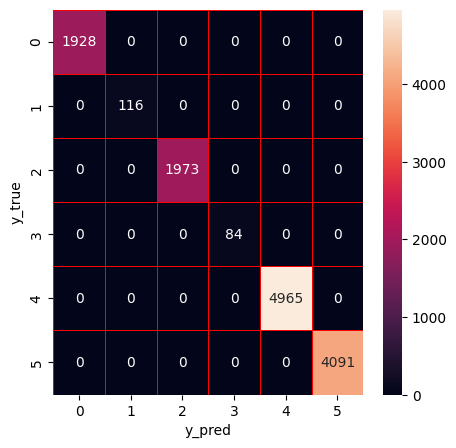

CPU times: user 4.49 s, sys: 143 ms, total: 4.64 s
Wall time: 2.54 s


In [ ]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1928
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00      1973
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00      4965
           5       1.00      1.00      1.00      4091

    accuracy                           1.00     13157
   macro avg       1.00      1.00      1.00     13157
weighted avg       1.00      1.00      1.00     13157

Accuracy of CatBoost: 1.0
Precision of CatBoost: 1.0
Recall of CatBoost: 1.0
Average F1 of CatBoost: 1.0
F1 of CatBoost for each type of attack: [1. 1. 1. 1. 1. 1.]


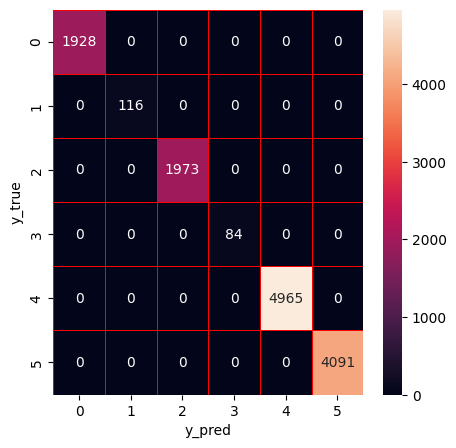

CPU times: user 1min 14s, sys: 1.54 s, total: 1min 15s
Wall time: 47.6 s


In [ ]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

*ENSAMBLE METHOD*

In [ ]:
# Leading model list for each class
model=[]
for i in range(len(lg_f1)):
    if max(lg_f1[i],xg_f1[i],cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append(cb)

In [ ]:
model

[LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier()]

In [ ]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 # Use this predicted class as the final predicted class

        elif y_pred1 != y_pred2 != y_pred3: # If the predicted classes of all the three models are different
            # For each prediction model, check if the predicted class’s original ML model is the same as its leader model
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0] # Use the predicted class of the leader model as the final prediction class

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence

                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3

        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0])

        yt.append(yi)
        yp.append(y_pred) # Save the predicted classes for all tested samples
    return yt, yp

In [ ]:
%%time
# Implementing LCCDE
yt, yp = LCCDE(X_test, y_test, m1 = lg, m2 = xg, m3 = cb)

CPU times: user 1min 30s, sys: 3.61 s, total: 1min 33s
Wall time: 52.5 s


In [ ]:
# The performance of the proposed lCCDE model
print("Accuracy of LCCDE: "+ str(accuracy_score(yt, yp)))
print("Precision of LCCDE: "+ str(precision_score(yt, yp, average='weighted')))
print("Recall of LCCDE: "+ str(recall_score(yt, yp, average='weighted')))
print("Average F1 of LCCDE: "+ str(f1_score(yt, yp, average='weighted')))
print("F1 of LCCDE for each type of attack: "+ str(f1_score(yt, yp, average=None)))

Accuracy of LCCDE: 1.0
Precision of LCCDE: 1.0
Recall of LCCDE: 1.0
Average F1 of LCCDE: 1.0
F1 of LCCDE for each type of attack: [1. 1. 1. 1. 1. 1.]


In [ ]:
# Comparison: The F1-scores for each base model
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))

F1 of LightGBM for each type of attack: [1. 1. 1. 1. 1. 1.]
F1 of XGBoost for each type of attack: [0.9997406  1.         1.         1.         0.99989939 1.        ]
F1 of CatBoost for each type of attack: [1. 1. 1. 1. 1. 1.]
